In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [26]:
df = pd.read_csv("Resources/bank.csv")

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Evaluating Data
- No missing data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [31]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [32]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Feature generation and conversions 
- Will need to convert columns to index values or onehot encoding

## Jobs

In [35]:
df["job"].nunique()

12

In [47]:
job_index = [x for x in range(df['job'].nunique())]

In [48]:
jobs = list(df["job"].unique())

In [49]:
jobs_index = dict(zip(jobs, job_index))

In [50]:
jobs_index

{'unemployed': 0,
 'services': 1,
 'management': 2,
 'blue-collar': 3,
 'self-employed': 4,
 'technician': 5,
 'entrepreneur': 6,
 'admin.': 7,
 'student': 8,
 'housemaid': 9,
 'retired': 10,
 'unknown': 11}

In [52]:
df["job"] = df["job"].map(jobs_index)

## Marital status
- Using one hot encoding

In [58]:
maritalStatus = pd.get_dummies(df["marital"], drop_first=True)

In [60]:
df = pd.concat([df, maritalStatus], axis=1)

In [61]:
df.drop("marital", axis=1, inplace=True)

## Education

In [64]:
df["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [69]:
ed_index = [x for x in range(df["education"].nunique())]

In [71]:
ed_list = list(df["education"].unique())

In [72]:
ed_list_and_index = dict(zip(ed_list,ed_index))

In [73]:
ed_list_and_index

{'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}

In [75]:
df["education"] =df["education"].map(ed_list_and_index)

In [77]:
df.head(5)

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single
0,30,0,0,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1,0
1,33,1,1,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,1,0
2,35,2,2,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,1
3,30,2,2,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1,0
4,59,3,1,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1,0


#### Default/Housing/loan/contact

In [80]:
df["default"] = pd.get_dummies(df["default"], drop_first=True)

In [82]:
df["loan"].nunique()

2

In [83]:
df["housing"].nunique()

2

#### contact
- we will concat these to the dataframe

In [84]:
df["contact"].nunique()

3

In [85]:
df["loan"] = pd.get_dummies(df["loan"], drop_first=True)

In [87]:
df["housing"] = pd.get_dummies(df["housing"], drop_first=True)

In [91]:
contact = pd.get_dummies(df["contact"], drop_first=True)

In [92]:
df = pd.concat([df, contact], axis=1)

In [ ]:
df.drop("contact", axis=1, inplace=True)

#### Postcome

In [97]:
df["poutcome"].nunique()

4

In [99]:
postCome = pd.get_dummies(df["poutcome"], drop_first=True)

In [101]:
df = pd.concat([df, postCome], axis=1)

In [104]:
df.drop("poutcome", axis=1, inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 21 columns):
age          4521 non-null int64
job          4521 non-null int64
education    4521 non-null int64
default      4521 non-null uint8
balance      4521 non-null int64
housing      4521 non-null uint8
loan         4521 non-null uint8
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
y            4521 non-null object
married      4521 non-null uint8
single       4521 non-null uint8
telephone    4521 non-null uint8
unknown      4521 non-null uint8
other        4521 non-null uint8
success      4521 non-null uint8
unknown      4521 non-null uint8
dtypes: int64(9), object(2), uint8(10)
memory usage: 432.8+ KB


### Remaining data type to convert

In [112]:
df.select_dtypes(include=object)

,month,y
0,oct,no
1,may,no
2,apr,no
3,jun,no
4,may,no
...,...,...
4516,jul,no
4517,may,no
4518,aug,no
4519,feb,no


##### Month 

In [113]:
df["month"].nunique()

12

In [116]:
month_index = [x for x in range(df["month"].nunique()) ]

In [117]:
uniqe_months = list(df["month"].unique())

In [118]:
uniqe_months

['oct',
 'may',
 'apr',
 'jun',
 'feb',
 'aug',
 'jan',
 'jul',
 'nov',
 'sep',
 'mar',
 'dec']

In [119]:
month_and_index = dict(zip(uniqe_months, month_index))

In [120]:
month_and_index

{'oct': 0,
 'may': 1,
 'apr': 2,
 'jun': 3,
 'feb': 4,
 'aug': 5,
 'jan': 6,
 'jul': 7,
 'nov': 8,
 'sep': 9,
 'mar': 10,
 'dec': 11}

In [123]:
df["month"] = df["month"].map(month_and_index)

In [125]:
df.select_dtypes(include=object)

,y
0,no
1,no
2,no
3,no
4,no
...,...
4516,no
4517,no
4518,no
4519,no


### Converting Target

In [126]:
df["y"] = pd.get_dummies(df["y"], drop_first=True)

### Visualizations
- unbalanced target 
- may need a better and more balanced data set

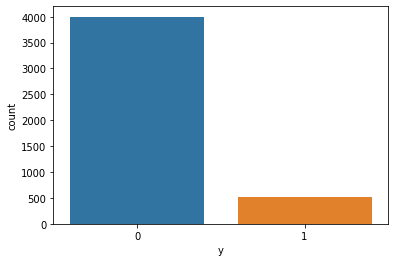

In [128]:
sns.countplot(df["y"])

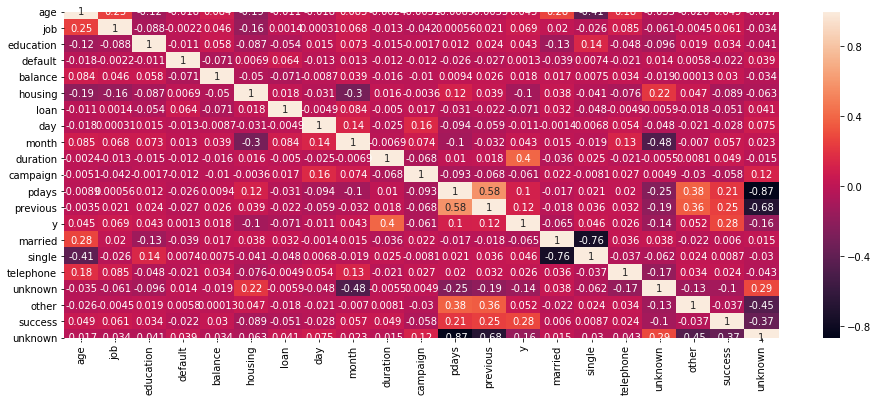

In [130]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True)

## Coorelation to target

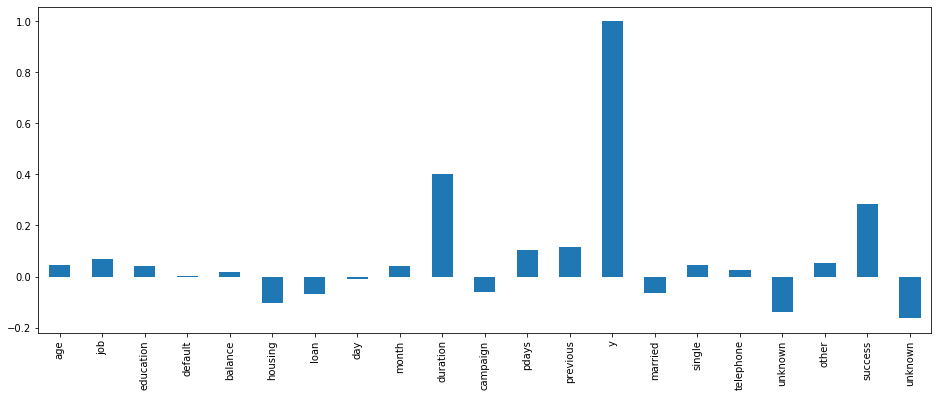

In [134]:
plt.figure(figsize=(16,6))
df.corrwith(df["y"]).plot(kind = "bar")

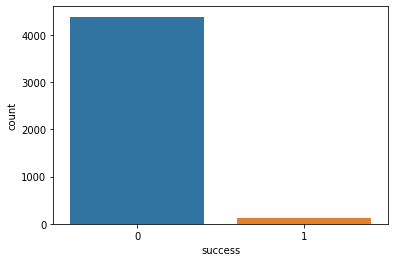

In [136]:
sns.countplot(df["success"])

#  Data prepration

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [143]:
X = df.drop("y", axis=1)
y = df["y"]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [147]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164 entries, 4153 to 860
Data columns (total 20 columns):
age          3164 non-null int64
job          3164 non-null int64
education    3164 non-null int64
default      3164 non-null uint8
balance      3164 non-null int64
housing      3164 non-null uint8
loan         3164 non-null uint8
day          3164 non-null int64
month        3164 non-null int64
duration     3164 non-null int64
campaign     3164 non-null int64
pdays        3164 non-null int64
previous     3164 non-null int64
married      3164 non-null uint8
single       3164 non-null uint8
telephone    3164 non-null uint8
unknown      3164 non-null uint8
other        3164 non-null uint8
success      3164 non-null uint8
unknown      3164 non-null uint8
dtypes: int64(10), uint8(10)
memory usage: 302.8 KB


In [148]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 2398 to 1498
Data columns (total 20 columns):
age          1357 non-null int64
job          1357 non-null int64
education    1357 non-null int64
default      1357 non-null uint8
balance      1357 non-null int64
housing      1357 non-null uint8
loan         1357 non-null uint8
day          1357 non-null int64
month        1357 non-null int64
duration     1357 non-null int64
campaign     1357 non-null int64
pdays        1357 non-null int64
previous     1357 non-null int64
married      1357 non-null uint8
single       1357 non-null uint8
telephone    1357 non-null uint8
unknown      1357 non-null uint8
other        1357 non-null uint8
success      1357 non-null uint8
unknown      1357 non-null uint8
dtypes: int64(10), uint8(10)
memory usage: 129.9 KB


In [151]:
lr = LogisticRegression(max_iter= 200)

In [152]:
lr_model = lr.fit(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [154]:
lr_model.coef_

array([[ 7.72946059e-04,  6.77236467e-02,  1.72422564e-01,
         5.05032209e-01, -6.14957735e-06, -5.73876975e-01,
        -6.43828653e-01,  3.92543813e-03, -3.75997183e-02,
         4.27699524e-03, -7.91015518e-02, -1.70129742e-03,
        -9.31059599e-03, -4.71659215e-01, -2.56197797e-01,
         4.72554399e-02, -1.22503633e+00,  4.50556301e-01,
         2.03595349e+00, -6.83036939e-01]])

In [161]:
coeff = pd.DataFrame(lr_model.coef_, columns= X_train.columns,).transpose()

In [162]:
coeff.columns = ["coeff"]

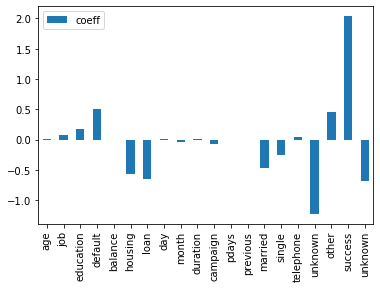

In [165]:
coeff.plot(kind = 'bar')

### Logistic Classifier Predictions

In [166]:
predicitons = lr_model.predict(X_test)

In [173]:
prediction_df = pd.DataFrame(zip(y_test, predicitons), columns=["true", "pred"])

## metrics

In [175]:
print(confusion_matrix(prediction_df["pred"], prediction_df["true"]))

[[1170  106]
 [  35   46]]


## Model performance
- Model did better at predicting Not paying 
- This is because this is an unblanced data set
- need a more balanced data set to create an accurate model for both outcomes

In [176]:
print(classification_report(prediction_df["pred"], prediction_df["true"]))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1276
           1       0.30      0.57      0.39        81

    accuracy                           0.90      1357
   macro avg       0.64      0.74      0.67      1357
weighted avg       0.93      0.90      0.91      1357



### Random Forest

In [178]:
rf = RandomForestClassifier()

In [179]:
rf_model = rf.fit(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [180]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [181]:
prediciton = rf_model.predict(X_test)

In [184]:
rf_predict_df = pd.DataFrame(zip(y_test, prediciton), columns=["true", "predicitons"])

In [185]:
rf_predict_df

,true,predicitons
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1352,0,0
1353,0,0
1354,0,0
1355,0,0


In [190]:
print(confusion_matrix(rf_predict_df["predicitons"], prediction_df["true"]))

[[1172  116]
 [  33   36]]


In [191]:
print(classification_report(rf_predict_df["predicitons"], prediction_df["true"]))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1288
           1       0.24      0.52      0.33        69

    accuracy                           0.89      1357
   macro avg       0.60      0.72      0.63      1357
weighted avg       0.94      0.89      0.91      1357



# Testing Model
- will use model on random data for the original data frame
- some data the m odel has seen and some not
- this will be a representation of how we will use the model when new data is passed

In [279]:
from random import randint
random_index = randint(0, len(df))
random_customer = df.drop("y", axis=1).iloc[random_index]

In [280]:
X_train.values.shape

(3164, 20)

In [281]:
random_customer.values.shape

(20,)

### Reshaping New Customer

In [282]:
new_customer = random_customer.values.reshape(1,20)

In [283]:
new_customer

array([[  41,    2,    2,    0, 5037,    0,    0,   23,    2,  252,    9,
         185,    5,    0,    0,    0,    0,    1,    0,    0]])

## Making prediciton on new customer

In [284]:
lr_model.predict(new_customer)

array([0], dtype=uint8)

## Actual value 

In [285]:
df.iloc[random_index]["y"]

1